<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Temperature-Prediction/blob/main/TemperaturePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARIES

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

#IMPORT DATA

In [ ]:
from google.colab import drive
drive.mount('/content/Drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/Drive/


In [ ]:
path = '/content/Drive/My Drive/Temperature Prediction/Bias_correction_ucl.csv'
data = pd.read_csv(path)
data.head()

,Station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233948,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.8960,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.3125,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204092,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.5557,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.9648,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.5522,31.2,22.5


In [ ]:
print("Data.shape:", data.shape)

Data.shape: (7752, 25)


In [ ]:
import datetime as dt
data['Date'] = pd.to_datetime(data['Date'])
data['Date']= data['Date'].map(dt.datetime.toordinal)
data.head()

,Station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233948,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.8960,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.3125,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204092,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.5557,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.9648,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.5522,31.2,22.5


In [ ]:
print(data.isnull().sum().sum())
data.fillna(value = 0, inplace = True)
print(data.isnull().sum().sum())

1246
0


In [ ]:
print(np.any(np.isnan(data)))
print(np.all(np.isfinite(data)))

False
True


In [ ]:
data['Present_Tmax'].apply(lambda x: '{:.1f}'.format(x))
data['Present_Tmin'].apply(lambda x: '{:.1f}'.format(x))
data['LDAPS_RHmin'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_RHmax'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_Tmax_lapse'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_Tmin_lapse'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_WS'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_LH'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_CC1'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_CC2'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_CC3'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_CC4'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_PPT1'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_PPT2'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_PPT3'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_PPT4'].apply(lambda x: '{:.7f}'.format(x))
data['lat'].apply(lambda x: '{:.4f}'.format(x))
data['lon'].apply(lambda x: '{:.3f}'.format(x))
data['DEM'].apply(lambda x: '{:.4f}'.format(x))
data['Slope'].apply(lambda x: '{:.4f}'.format(x))
data['Solar radiation'].apply(lambda x: '{:.4f}'.format(x))
data['Next_Tmax'].apply(lambda x: '{:.1f}'.format(x))
data['Next_Tmin'].apply(lambda x: '{:.1f}'.format(x))

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7747    18.1
7748    18.8
7749    17.4
7750    11.3
7751    29.8
Name: Next_Tmin, Length: 7752, dtype: object

In [ ]:
print(np.any(np.isnan(data)))
print(np.all(np.isfinite(data)))

False
True


#VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71e5791c18>,
      dtype=object)

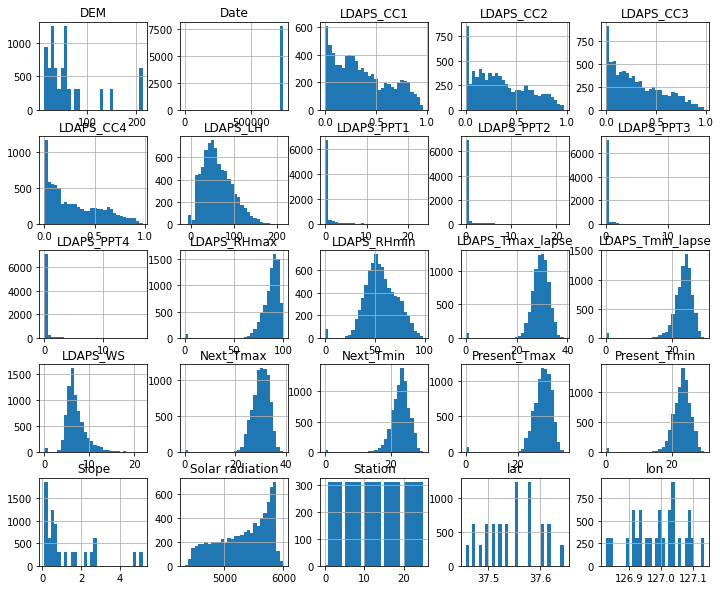

In [ ]:
data.hist(figsize = (12,10), bins = 30)

#MODEL TRAINING

In [ ]:
X = data.drop(['Next_Tmax', 'Next_Tmin'] , axis=1).values
Y = data[['Next_Tmax', 'Next_Tmin']].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print("X_train.shape:", X_train.shape, "X_test.shape:", X_test.shape, "Y_train.shape:", Y_train.shape, "Y_test.shape:", Y_test.shape)

X_train.shape: (6201, 23) X_test.shape: (1551, 23) Y_train.shape: (6201, 2) Y_test.shape: (1551, 2)


In [ ]:
REGRESSOR = ['LINEAR REGRESSION','RIDGE REGRESSION','RIDGE COMPLEXITY','LASSO REGRESSION','LARS LASSO REGRESSION', 'DECISION TREE','RANDOM FOREST']
TRAIN_ACCURACY = []
VARIANCE_SCORE = []
ABSOLUTE_ERROR = []
MEAN_SQUARED_ERROR = []
MEDIAN_ABSOLUTE_ERROR = []
R_SQUARE_SCORE = []

#LINEAR REGRESSION

In [ ]:
from sklearn import linear_model, metrics

LR = linear_model.LinearRegression(normalize=True)

LR.fit(X_train, Y_train)
LR_pred = LR.predict(X_test)
print ('Coefficients: ', LR.coef_)
print ('Intercept: ', LR.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", LR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,LR_pred))
#print("MAX ERROR:\t\t", metrics.max_error(Y_test,LR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test,LR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test,LR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,LR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,LR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test,LR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test,LR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,LR_pred))

Coefficients:  [[ 1.69252236e-02  4.08745028e-06  8.03358187e-02  1.57664346e-01
   8.86470260e-03 -1.05673897e-01  2.55265442e-01  1.68686330e-01
  -2.89288652e-01  9.78032020e-03 -1.50746394e+00 -7.31515197e-01
  -1.66490092e+00 -1.47178809e+00  8.76488993e-02  1.53854041e-01
   1.63323109e-02  6.84153624e-02  1.68577221e+00 -1.34553420e+00
  -3.80960118e-03  2.56138381e-01  7.22855686e-04]
 [-1.05678920e-03  2.66402609e-06 -7.13987683e-02  3.33370796e-01
  -1.33155624e-03 -9.14484184e-02 -2.68918632e-01  7.77137098e-01
  -9.32558561e-02  4.28621604e-03 -8.70111487e-01  3.96197323e-01
  -1.11585075e+00 -2.30207241e-01  5.30615520e-02 -6.70829031e-03
   8.21542272e-02 -5.17217494e-03  1.33518826e+00 -6.38662046e-02
  -8.20649317e-03  3.35478450e-01  5.66889581e-04]]
Intercept:  [124.96058098 -30.8033183 ]

REGRESSION REPORT:

TRAINING ACCURACY:	 0.5535776492832564
VARIANCE SCORE:		 0.5908961160610955
ABSOLUTE ERROR:		 1.2174704240468386
MEAN SQUARED ERROR:	 4.168214008853111
MEDIAN AB

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [ ]:
TRAIN_ACCURACY.append(LR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,LR_pred))
#MAX_ERROR.append(metrics.max_error(Y_test,LR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test,LR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test,LR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test,LR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test,LR_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


#RIDGE REGRESSION

In [ ]:
from sklearn import linear_model, metrics

RR = linear_model.Ridge(alpha=.5)
RR.fit(X_train, Y_train)
RR_pred = RR.predict(X_test)
print ('Coefficients: ', RR.coef_)
print ('Intercept: ', RR.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", RR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,RR_pred))
#print("MAX ERROR:\t\t", metrics.max_error(Y_test,RR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test,RR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test,RR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,RR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,RR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test,RR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test,RR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,RR_pred))

Coefficients:  [[ 1.68486171e-02  4.08233984e-06  8.03828162e-02  1.57660630e-01
   8.88015935e-03 -1.05655231e-01  2.55371965e-01  1.68429909e-01
  -2.89258389e-01  9.79027602e-03 -1.50429556e+00 -7.34853229e-01
  -1.66169969e+00 -1.47111774e+00  8.75094744e-02  1.53814311e-01
   1.61920933e-02  6.81736893e-02  1.61622276e+00 -1.31719101e+00
  -3.81654438e-03  2.56315909e-01  7.22825681e-04]
 [-1.12704115e-03  2.66270540e-06 -7.13419553e-02  3.33345205e-01
  -1.30286887e-03 -9.14322966e-02 -2.68765358e-01  7.76854983e-01
  -9.32582353e-02  4.28899853e-03 -8.65973724e-01  3.88963625e-01
  -1.10904232e+00 -2.33124588e-01  5.29449305e-02 -6.58875296e-03
   8.20067692e-02 -5.22085498e-03  1.28547933e+00 -5.57502294e-02
  -8.21305726e-03  3.35638451e-01  5.66858627e-04]]
Intercept:  [123.97481402 -29.96778166]

REGRESSION REPORT:

TRAINING ACCURACY:	 0.553576744304304
VARIANCE SCORE:		 0.5908904509795067
ABSOLUTE ERROR:		 1.2174641574013707
MEAN SQUARED ERROR:	 4.168235663206806
MEDIAN ABS

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [ ]:
TRAIN_ACCURACY.append(RR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,RR_pred))
#MAX_ERROR.append(metrics.max_error(Y_test,RR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test,RR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test,RR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test,RR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test,RR_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


#RIDGE COMPLEXITY

In [ ]:
from sklearn import linear_model, metrics

RC = linear_model.RidgeCV()
RC.fit(X_train, Y_train)
RC_pred = RC.predict(X_test)
print ('Coefficients: ', RC.coef_)
print ('Intercept: ', RC.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", RC.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,RC_pred))
#print("MAX ERROR:\t\t", metrics.max_error(Y_test,RC_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test,RC_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test,RC_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,RC_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,RC_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test,RC_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test,RC_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,RC_pred))

Coefficients:  [[ 1.67784947e-02  4.07429980e-06  8.04257440e-02  1.57658945e-01
   8.89064968e-03 -1.05638429e-01  2.55476163e-01  1.68190921e-01
  -2.89233070e-01  9.79998787e-03 -1.50109647e+00 -7.38052783e-01
  -1.65844398e+00 -1.47041536e+00  8.73721998e-02  1.53774293e-01
   1.60507644e-02  6.79371107e-02  1.55201627e+00 -1.29048613e+00
  -3.82274911e-03  2.56479569e-01  7.22784483e-04]
 [-1.19237535e-03  2.65356903e-06 -7.12881629e-02  3.33321163e-01
  -1.27729147e-03 -9.14175781e-02 -2.68615666e-01  7.76586688e-01
  -9.32631740e-02  4.29163123e-03 -8.61862340e-01  3.81906357e-01
  -1.10231512e+00 -2.35957593e-01  5.28305876e-02 -6.47187264e-03
   8.18603103e-02 -5.26760028e-03  1.23944500e+00 -4.84473268e-02
  -8.21906612e-03  3.35786452e-01  5.66820027e-04]]
Intercept:  [122.9987386  -29.16113864]

REGRESSION REPORT:

TRAINING ACCURACY:	 0.5535742611903482
VARIANCE SCORE:		 0.5908836454811851
ABSOLUTE ERROR:		 1.2174628363203563
MEAN SQUARED ERROR:	 4.168271513182919
MEDIAN AB

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [ ]:
TRAIN_ACCURACY.append(RC.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,RC_pred))
#MAX_ERROR.append(metrics.max_error(Y_test,RC_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test,RC_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test,RC_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test,RC_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test,RC_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


#LASSO REGRESSION

In [ ]:
from sklearn import linear_model, metrics

LassoR = linear_model.Lasso(alpha=0.1)
LassoR.fit(X_train, Y_train)
LassoR_pred = LassoR.predict(X_test)
print ('Coefficients: ', LassoR.coef_)
print ('Intercept: ', LassoR.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", LassoR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,LassoR_pred))
#print("MAX ERROR:\t\t", metrics.max_error(Y_test, LassoR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, LassoR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, LassoR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, LassoR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, LassoR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, LassoR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, LassoR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,LassoR_pred))

Coefficients:  [[ 1.58357146e-02  1.29288105e-06  7.63804081e-02  1.82774293e-01
  -2.76537494e-02 -1.03596442e-01  3.52497604e-01  7.45871424e-02
  -3.00526271e-01  1.46405778e-02 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -8.15935465e-02  9.75978515e-03  5.26321190e-02
  -6.75613420e-03 -7.87277266e-03  0.00000000e+00 -0.00000000e+00
  -3.80055741e-04  1.59388510e-01  6.55960418e-04]
 [ 0.00000000e+00  1.55388247e-06 -3.46716446e-02  3.17049873e-01
   2.59052739e-03 -9.39366519e-02 -1.26828585e-01  6.00497782e-01
  -8.61149717e-02  4.39257784e-03 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -5.05538005e-03  1.85424939e-01  4.73623747e-04]]
Intercept:  [18.61953613 11.13965137]

REGRESSION REPORT:

TRAINING ACCURACY:	 0.5255302560004378
VARIANCE SCORE:		 0.5685433321874758
ABSOLUTE ERROR:		 1.2786369060279348
MEAN SQUARED ERROR:	 4.426024615089783
MEDIAN ABSO

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [ ]:
TRAIN_ACCURACY.append(LassoR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,LassoR_pred))
#MAX_ERROR.append(metrics.max_error(Y_test, LassoR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, LassoR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, LassoR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, LassoR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, LassoR_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


#LARS LASSO REGRESSION

In [ ]:
from sklearn import linear_model, metrics

LARSLassoR = linear_model.LassoLars(alpha=0.1)
LARSLassoR.fit(X_train, Y_train)
LARSLassoR_pred = LARSLassoR.predict(X_test)
print ('Coefficients: ', LARSLassoR.coef_)
print ('Intercept: ', LARSLassoR.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", LARSLassoR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,LARSLassoR_pred))
#print("MAX ERROR:\t\t", metrics.max_error(Y_test, LARSLassoR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, LARSLassoR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, LARSLassoR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, LARSLassoR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, LARSLassoR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, LARSLassoR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, LARSLassoR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,LARSLassoR_pred))

Coefficients:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Intercept:  [30.17734236 22.864796  ]

REGRESSION REPORT:

TRAINING ACCURACY:	 0.0
VARIANCE SCORE:		 -5.551115123125783e-16
ABSOLUTE ERROR:		 2.32185063327175
MEAN SQUARED ERROR:	 10.208162921161248
MEDIAN ABSOLUTE ERROR:   1.956273181744896
R-SQUARE SCORE:  	 -0.00030985966481600347


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [ ]:
TRAIN_ACCURACY.append(LARSLassoR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,LARSLassoR_pred))
#MAX_ERROR.append(metrics.max_error(Y_test, LARSLassoR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, LARSLassoR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, LARSLassoR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, LARSLassoR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, LARSLassoR_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


#DECISiON TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, Y_train)
DT_pred = DT.predict(X_test)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", DT.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,DT_pred))
#print("MAX ERROR:\t\t", metrics.max_error(Y_test, DT_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, DT_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, DT_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,DT_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,DT_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, DT_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, DT_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, DT_pred))


REGRESSION REPORT:

TRAINING ACCURACY:	 1.0
VARIANCE SCORE:		 0.24818404366954733
ABSOLUTE ERROR:		 1.1892649903288186
MEAN SQUARED ERROR:	 7.665644745325608
MEDIAN ABSOLUTE ERROR:   0.7499999999999982
R-SQUARE SCORE:  	 0.24787658491325082


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [ ]:
TRAIN_ACCURACY.append(DT.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,DT_pred))
#MAX_ERROR.append(metrics.max_error(Y_test, DT_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, DT_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, DT_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test,DT_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, DT_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


#RANDOM FOREST

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)
RF_pred = RF.predict(X_test)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", RF.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,RF_pred))
#print("MAX ERROR:\t\t", metrics.max_error(Y_test, RF_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, RF_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, RF_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, RF_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, RF_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, RF_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, RF_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, RF_pred))


REGRESSION REPORT:

TRAINING ACCURACY:	 0.9526288093058473
VARIANCE SCORE:		 0.6978865290832376
ABSOLUTE ERROR:		 0.7762865892972284
MEAN SQUARED ERROR:	 3.062410881689236
MEDIAN ABSOLUTE ERROR:   0.5214999999999961
R-SQUARE SCORE:  	 0.6978461659236359


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [ ]:
TRAIN_ACCURACY.append(RF.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,RF_pred))
#MAX_ERROR.append(metrics.max_error(Y_test, RF_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, RF_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, RF_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, RF_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, RF_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


#PERFORMANCE EVALUATION

In [ ]:
PERFORMANCE = pd.DataFrame({
'REGRESSOR' : REGRESSOR,
'ACCURACY %' : TRAIN_ACCURACY,
'VARIANCE SCORE' : VARIANCE_SCORE,
'ABSOLUTE ERROR' : ABSOLUTE_ERROR,
'MEAN SQUARED ERROR' : MEAN_SQUARED_ERROR,
'MEDIAN ABSOLUTE ERROR' : MEDIAN_ABSOLUTE_ERROR,
'R-SQUARE SCORE' : R_SQUARE_SCORE })

PERFORMANCE

,REGRESSOR,ACCURACY %,VARIANCE SCORE,ABSOLUTE ERROR,MEAN SQUARED ERROR,MEDIAN ABSOLUTE ERROR,R-SQUARE SCORE
0,LINEAR REGRESSION,0.553578,5.908961e-01,1.217470,4.168214,0.898519,0.590760
1,RIDGE REGRESSION,0.553577,5.908905e-01,1.217464,4.168236,0.897341,0.590754
2,RIDGE COMPLEXITY,0.553574,5.908836e-01,1.217463,4.168272,0.897691,0.590747
3,LASSO REGRESSION,0.525530,5.685433e-01,1.278637,4.426025,0.942121,0.568412
4,LARS LASSO REGRESSION,0.000000,-5.551115e-16,2.321851,10.208163,1.956273,-0.000310
5,DECISION TREE,1.000000,2.481840e-01,1.189265,7.665645,0.750000,0.247877
6,RANDOM FOREST,0.952629,6.978865e-01,0.776287,3.062411,0.521500,0.697846
